# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### importing covid19 dataset

In [2]:
corona_df = pd.read_csv(r"C:\Users\20109\Desktop\Covid-19 Cases VS Happiness Report\covid19_Confirmed_dataset.csv")
corona_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### check the shape of the dataframe

In [3]:
corona_df.shape

(266, 104)

### Delete the useless columns

In [4]:
corona_df = corona_df.drop(["Lat", "Long"], axis=1)

In [5]:
corona_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregating the rows by the country

In [6]:
# use group by function to aggregate the dataframe by Country 
corona_df_aggregated = corona_df.groupby("Country/Region").sum()

In [7]:
corona_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_df_aggregated.shape

(187, 100)

### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

C:\Users\20109\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'No. of Confirmed Cases')

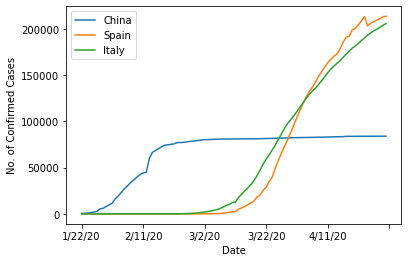

In [9]:
# After aggregation we can filter any country info and plot it & and we can compare 2 or more countries like the following example
corona_df_aggregated.loc["China"].plot()
corona_df_aggregated.loc["Spain"].plot()
corona_df_aggregated.loc["Italy"].plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("No. of Confirmed Cases")

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

C:\Users\20109\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

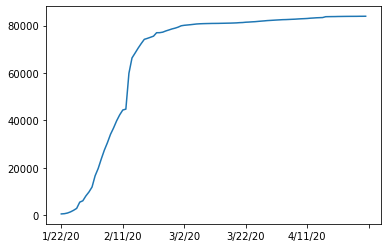

In [10]:
corona_df_aggregated.loc['China'].plot()

C:\Users\20109\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

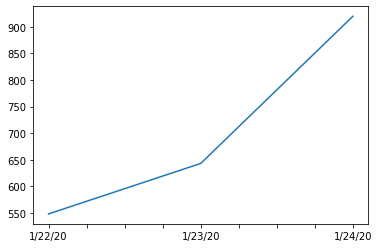

In [11]:
# Here we will change the time frame to check for the number of confirmed cases in the first 3 days 
corona_df_aggregated.loc["China"][:3].plot()

### caculating the first derivative of the curve

C:\Users\20109\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

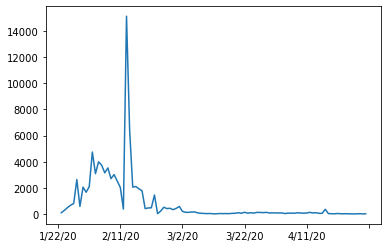

In [12]:
# Using diff method to calculate the first derivative of the data for China (the difference in number of cases each day)
# it shows us the change in infection rate day by day for China 
corona_df_aggregated.loc["China"].diff().plot()

### find maxmimum infection rate for China

In [13]:
# Getting the maximum number of confirmed new cases for China in 24 hours
corona_df_aggregated.loc["China"].diff().max()

15136.0

In [14]:
# Getting the maximum number of confirmed new cases for Italy in 24 hours
corona_df_aggregated.loc["Italy"].diff().max()

6557.0

In [15]:
# Getting the maximum number of confirmed new cases for Spain in 24 hours
corona_df_aggregated.loc["Spain"].diff().max()

9630.0

### find maximum infection rate for all of the countries. 

In [16]:
# creating a list of all countries in the dataset 
# using index attribute to get the countries names because our index in the countries column after the aggregation 
countries = list(corona_df_aggregated.index)

# creating an empty list called max_infection_rate
max_infection_rate = []

# creating a for loop to calculate the max infection rate for all the countries 
for c in countries:
    max_infection_rate.append(corona_df_aggregated.loc[c].diff().max())

# max_infection_rate now is a list that contains all the max infection rate for all countries 
# we will add this list as a column in our dataframe to use it in our analysis 
corona_df_aggregated["max_infection_rate"] = max_infection_rate

In [17]:
corona_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### create a new dataframe with only needed column 

In [18]:
# we will use the new column max_infection_rate and drop the cunused columns to create a new dataframe 
corona_data = pd.DataFrame(corona_df_aggregated["max_infection_rate"])

In [19]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### importing the dataset

In [20]:
happiness_report = pd.read_csv(r"C:\Users\20109\Desktop\Covid-19 Cases VS Happiness Report\worldwide_happiness_report.csv")

In [21]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### let's drop the useless columns 

In [22]:
# make a list od useless columns in the dataset to be dropped 
# overall rank is useless and score is a linear combination of all the other cols 
# also generosity and perceptions of corruptio are not important to our analysis 
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [23]:
happiness_report = happiness_report.drop(useless_cols, axis = 1)

In [24]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### changing the indices of the dataframe

In [25]:
# change the index to be the column (Country or region) because it will make it easy for us to join this dataset with corona data dataset
happiness_report.set_index("Country or region", inplace = True)

In [26]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### now let's join two dataset we have prepared  

#### Corona Dataset :

In [27]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [28]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [29]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [30]:
happiness_report.shape 

(156, 4)

In [31]:
# we will use the inner join to join both of the datasets because we have more countries in the corona dataset
# so we need the countries that exist in both datasets to be able to compare 
new_df = corona_data.join(happiness_report, how = "inner")

In [32]:
new_df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### correlation matrix 

In [33]:
# checking the correlation between variables 
new_df.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

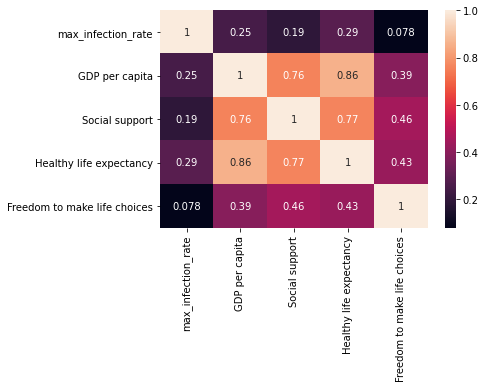

In [34]:
# using heatmap in seaborn to visualize the correlation between variables 
sns.heatmap(new_df.corr(), annot= True)

### Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [35]:
new_df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

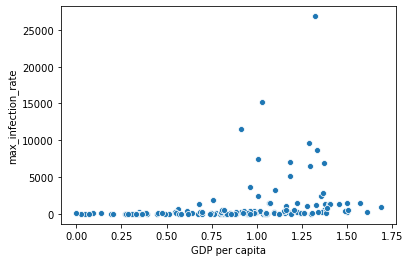

In [36]:
# creating x and y variables to be input in the scatterplot funtion
x = new_df['GDP per capita']
y = new_df['max_infection_rate']

sns. scatterplot(x, y)

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

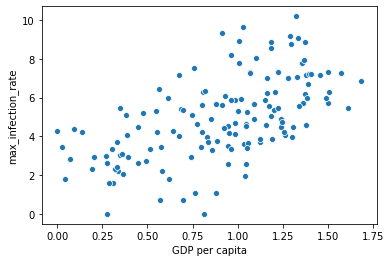

In [37]:
# plot the figure and used np.log function to rescale the y axis values so that we can see the relation clearly 
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

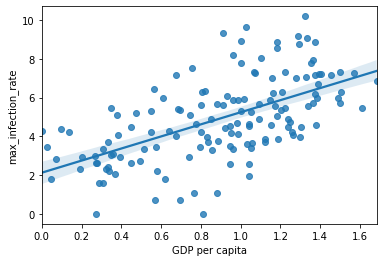

In [38]:
# using the regplot to plot the fitting line (linear regression)
sns.regplot(x, np.log(y))

### Plotting Social support vs maximum Infection rate

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

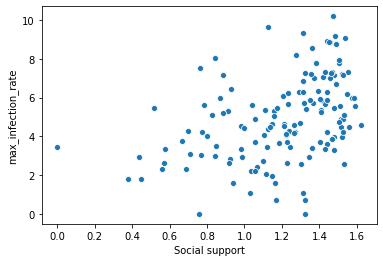

In [39]:
x = new_df['Social support']
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

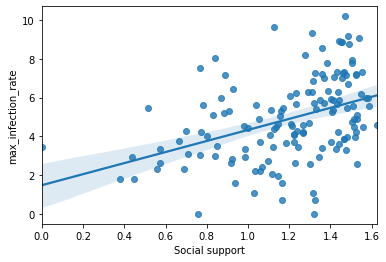

In [40]:
sns.regplot(x, np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

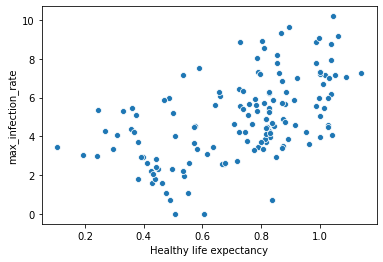

In [41]:
x = new_df['Healthy life expectancy']
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

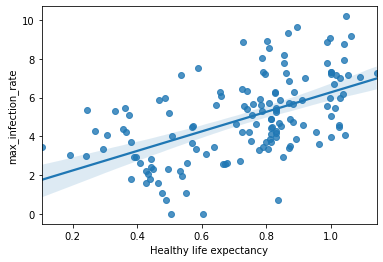

In [42]:
sns.regplot(x, np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

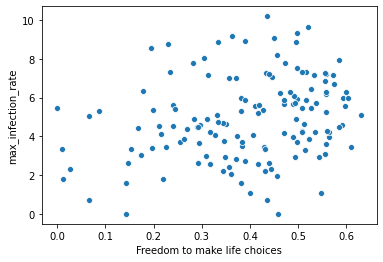

In [43]:
x = new_df['Freedom to make life choices']
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

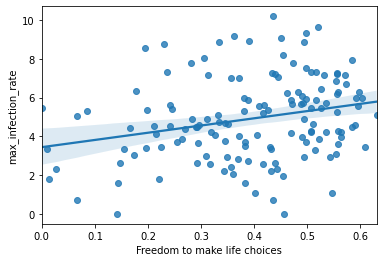

In [44]:
sns.regplot(x, np.log(y))